Time Series Analysis & Forecasting Furniture Sales

Joe Lardie

April 2023

# **Imports**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import itertools

from prophet import Prophet
from pylab import rcParams
from cmdstanpy import CmdStanModel

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing data set
df = pd.read_excel("C:\\Users\\davyd\\OneDrive\\Documents\\data\\Sample - Superstore.xlsm")

# **Forecasting Furniture Sales**

In [3]:
#Selecting the Furniture Category
furniture = df.loc[df['Category'] == 'Furniture']

In [4]:
#Setting the 4-year time period
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [5]:
#Removing unnecesary columns, checking missing values, aggregate sales by date
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [6]:
#Groupby order date and sales
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [7]:
#Indexing with Time Series Data
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [8]:
#Getting the average(mean) for each month
y = furniture['Sales'].resample('MS').mean()

In [9]:
#Looking at 2017 furniture sales data
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

# **Visualizing Furniture Sales Time Series Data**

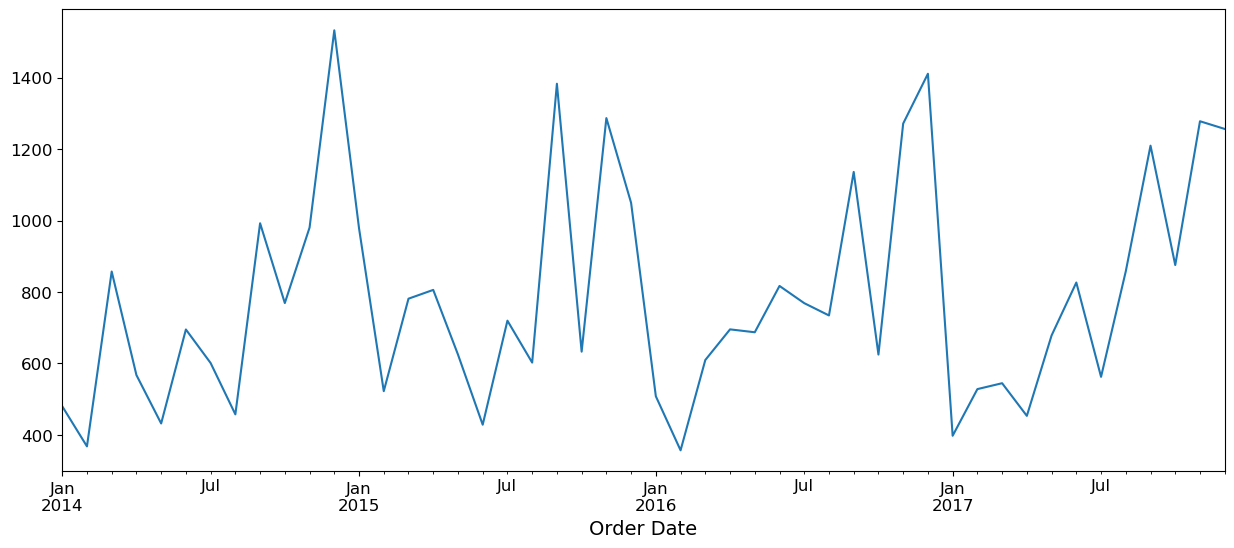

In [10]:
#Plotting the Sales over a period of 4 years(2014-2018)
y.plot(figsize=(15, 6))
plt.show()

# **Time Series Decomposition Visualization**

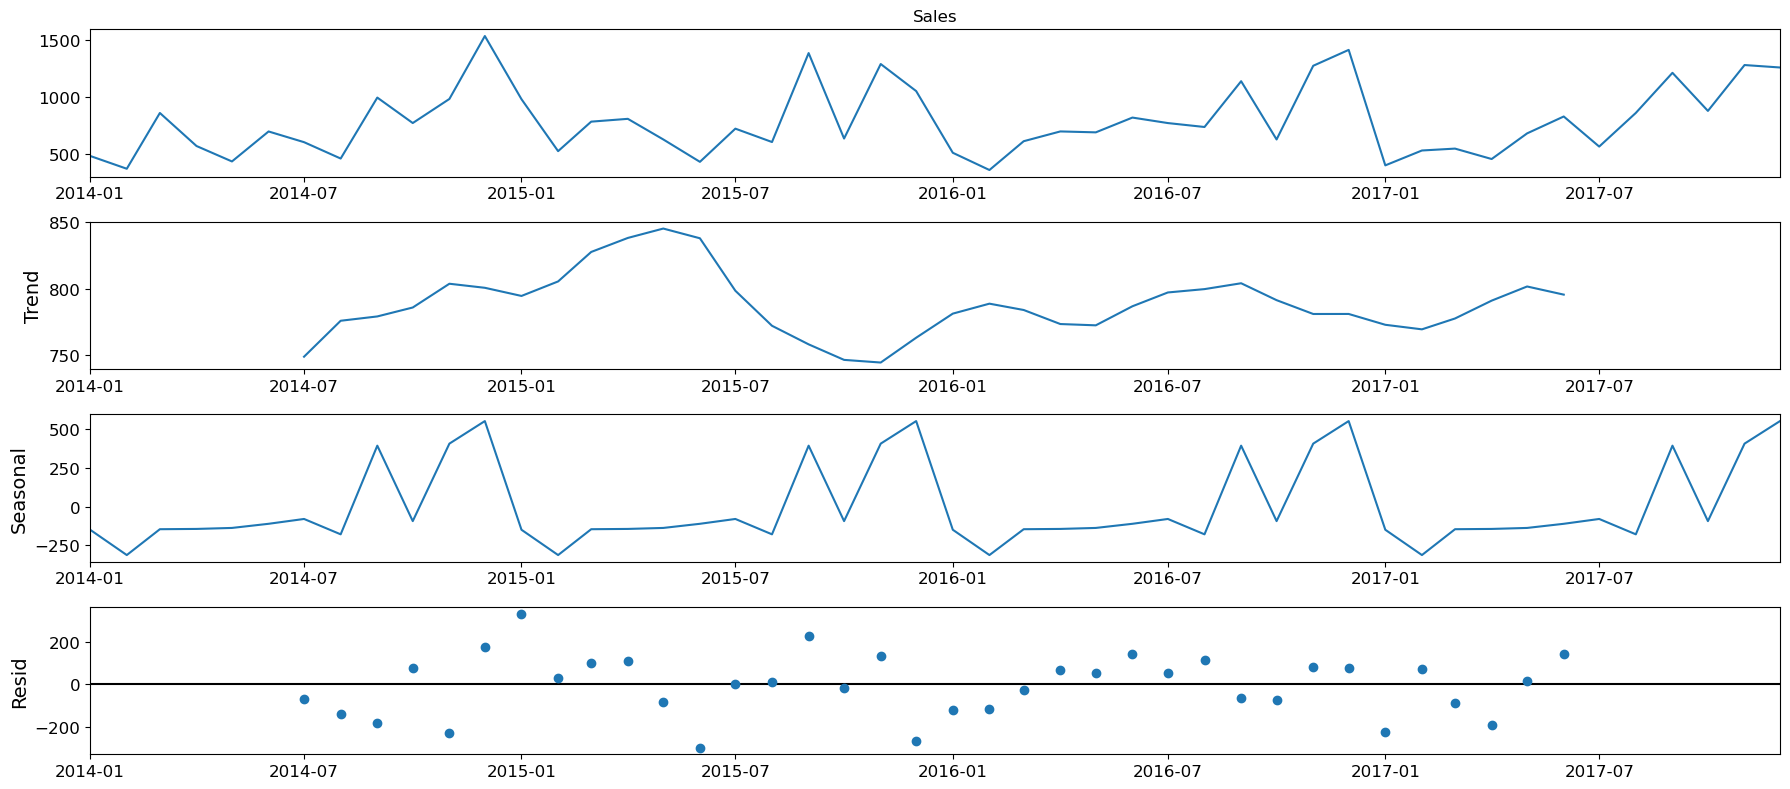

In [11]:
#Time series decomposition to visualize and separate the trends, seasonality, and noise.
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# **Time series forecasting with ARIMA**

In [12]:
#Autoregressive Integrated Moving Averages(ARIMA) are denoted as (p, d, q) account for seasonality, trend, and noise
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
#Loop for parameter selection to find the optimal set of parameters the yeild the best performance for our model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1359.2613166543165
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130918252
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793677
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1162.400200303408
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302517
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758108
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2686.290255485825
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809151
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732967
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5754723153666
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2378.4977360755684
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468674
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576524673
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1449.7633893837328
ARIMA

- The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78 meaning it is the best option.

# **Fitting the ARIMA model**

In [14]:
#fitting ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


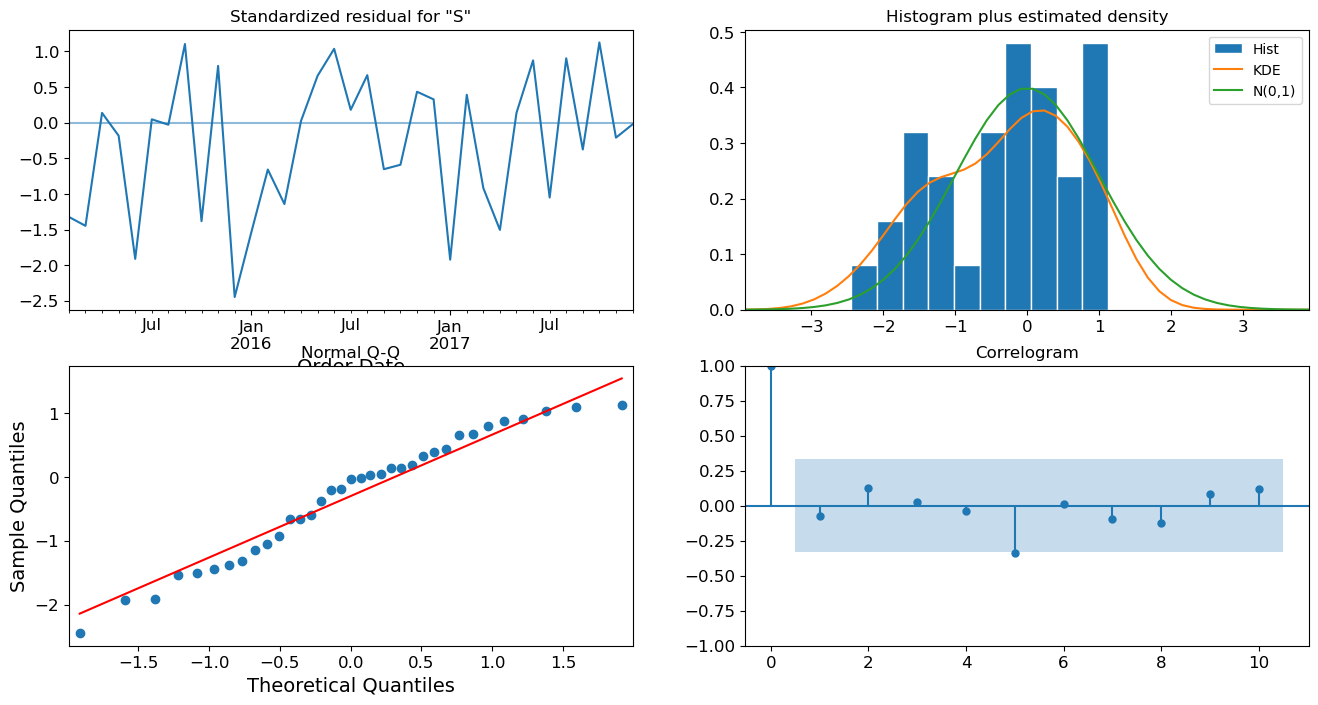

In [15]:
#Visualizing Diagnostics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

The model diagnostics suggests that the model residuals are near normally distributed.

# **Validating forecasts**

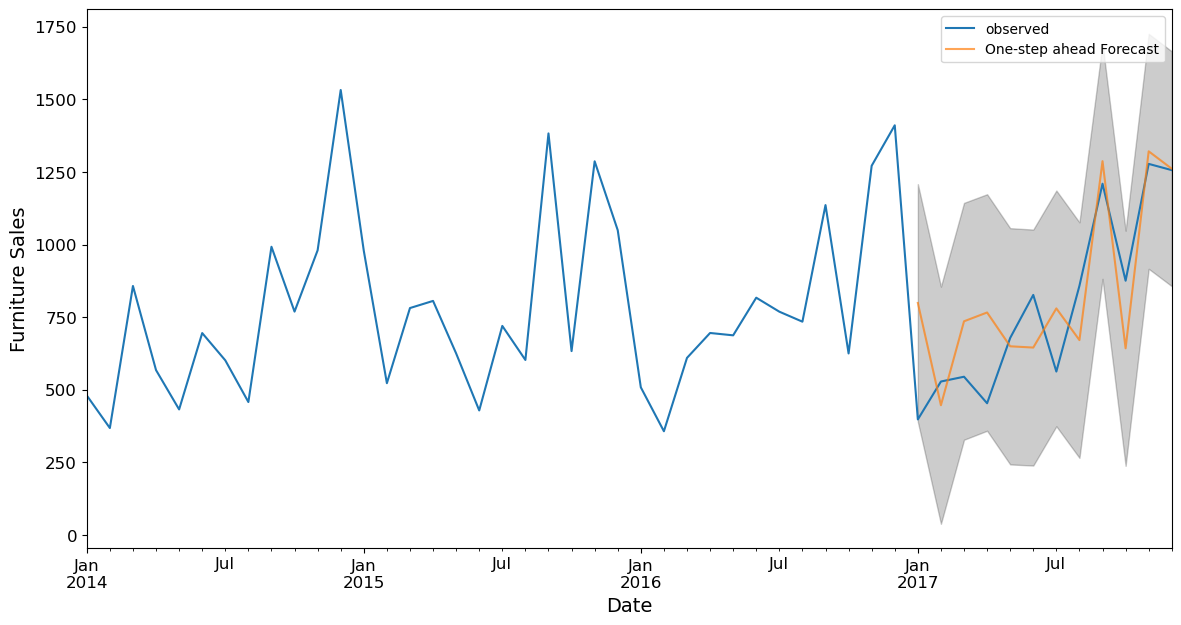

In [16]:
#Visualizing forecasts of furniture sales
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [17]:
#Calculating the MSE for the forecasts
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 39996.01


The Mean Squared Error of our forecasts is 22993.58

In [18]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 199.99


- The Root Mean Squared Error of our forecasts is 151.64
- The model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. 
- The Furniture daily sales range from around 400 to over 1200.

# **Producing and visualizing forecasts**

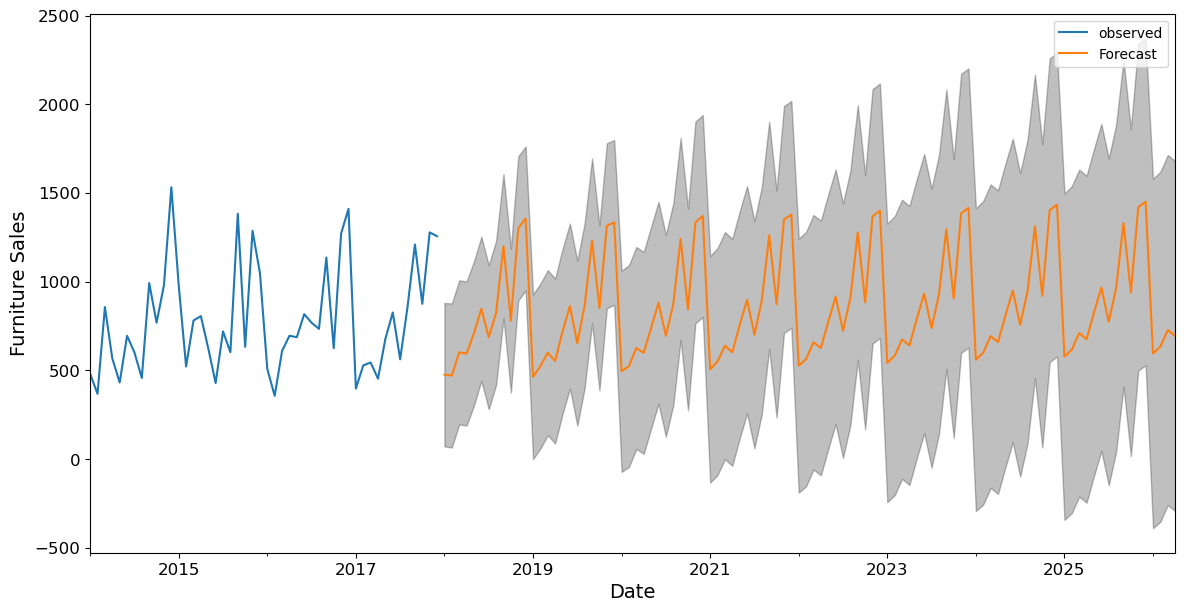

In [19]:
#Visualization of forecsts
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# **Time Series of Furniture vs. Office Supplies**

In [20]:
#Selecting 'Furniture' & 'Office Supplies'
#printing the shape of each
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

# **Data Exploration**

In [21]:
#Define a list of columns to drop from 'furniture' & 'office' dataframes
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
#Drop the columns listed in 'cols' from the 'furniture' & 'office' 
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
#Sorting the dataframes by 'Order Date'
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
#Group the 'furniture' and 'office' dataframes by 'Order Date' and sum the 'Sales' column for each group
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
#Set index of the 'furniture' & 'Office' dataframes to 'Order Data'
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
#Resample the 'Sales' column of the 'furniture' & 'office' dataframes to group by month and take the mean for each month
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
#Create new Dataframes for 'furniture' & 'Office' dataframes with 'Order Date' & 'Sales' columns
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
#Merge the two dataframes together on "Order Date" with inner join
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


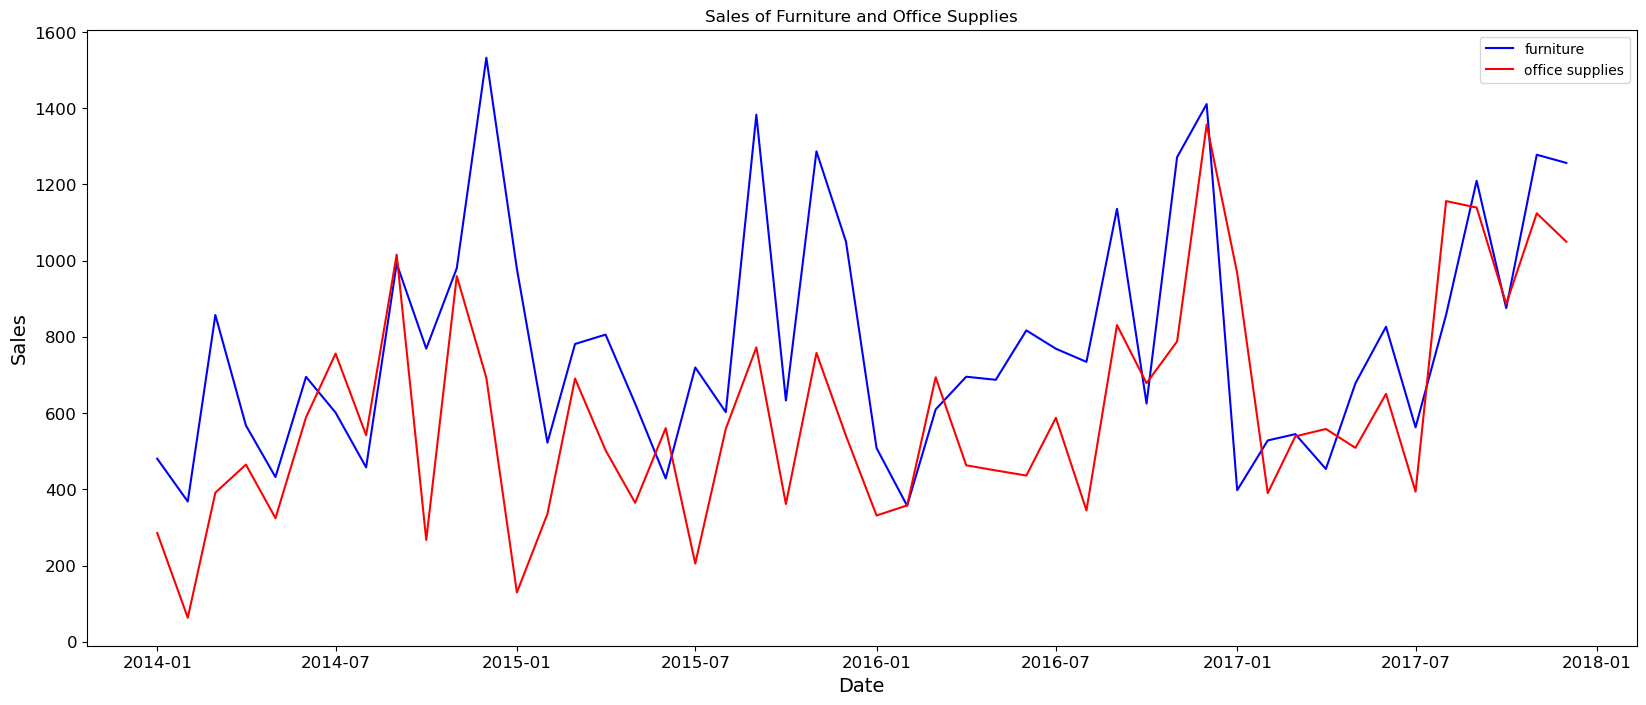

In [22]:
#plotting sales of furniture and office supplies
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [23]:
# Find the index of the first row where the "office_sales" column is greater than the "furniture_sales" column in the "store" dataframe,
# and use this index to get the corresponding value of the "Order Date" column
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


21:56:36 - cmdstanpy - INFO - Chain [1] start processing
21:56:37 - cmdstanpy - INFO - Chain [1] done processing
21:56:37 - cmdstanpy - INFO - Chain [1] start processing
21:56:38 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

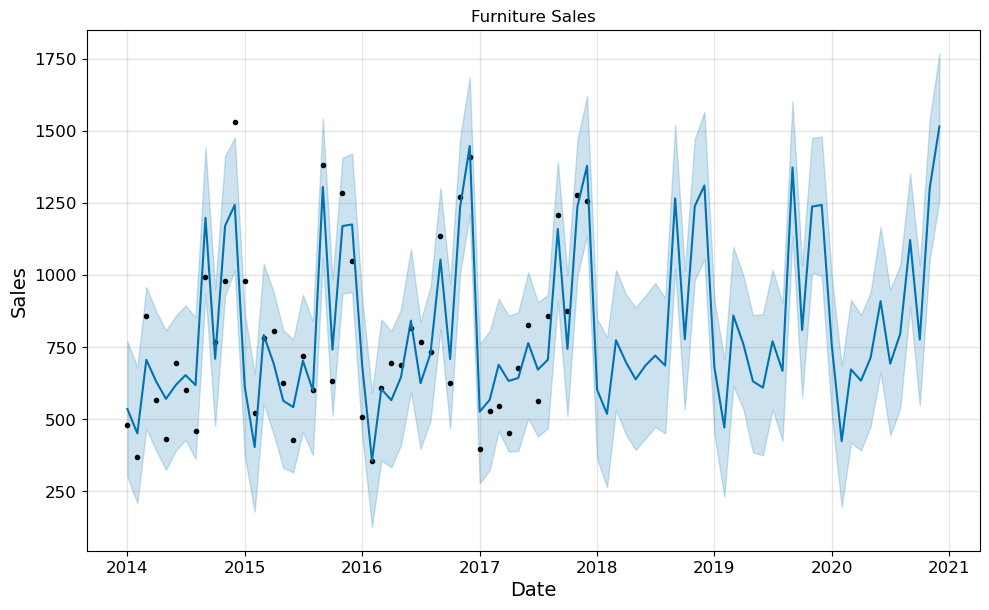

In [24]:
#Rename the columns of the furniture dataframe to match the input format for Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
#Create Prophet Models (Furniture&Office)
#Set interval_width parameter to the width of the uncertainty interval for the forecast
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
#Create new dataframe with future dates to make predictions for
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
#Visualize the forecasted sales of furniture over time 
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1800x600 with 0 Axes>

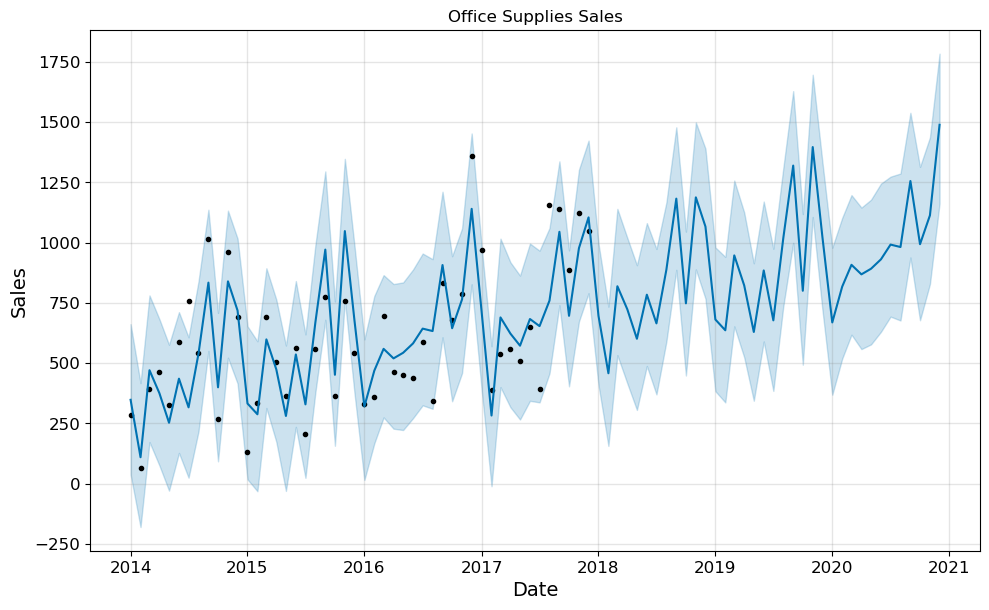

In [25]:
#Visualizing the Office Supplies Sales forecast
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

# **Compare Forecasts**

In [26]:
#Create new names for columns for 'furniture' and 'office' dataframes
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
#Create copies of the dataframes and rename the columns to the new names
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
#Merge the dataframes using inner join, the dataframe will now contain columns from both dataframes
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
#Renaming the the 'furniture_ds' column to 'Date' & dropping the 'office_ds' column
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,300.167623,769.930151,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,209.674871,680.342497,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,467.001567,959.193971,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,390.284316,873.103029,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,324.564895,808.362338,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


# **Trend and Forecast Visualization**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


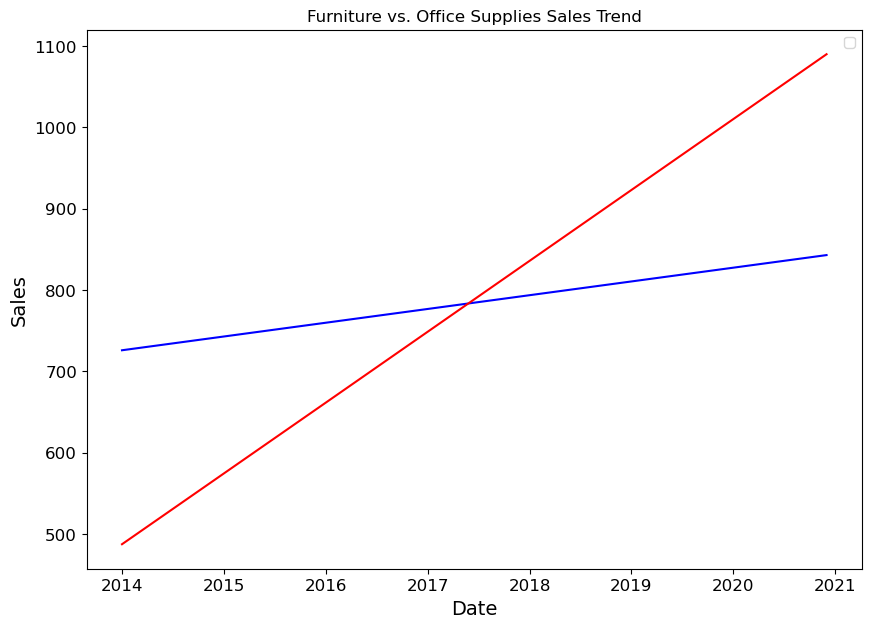

In [27]:
#Plotting the Furniture vs Office Supplies Sales Trend
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


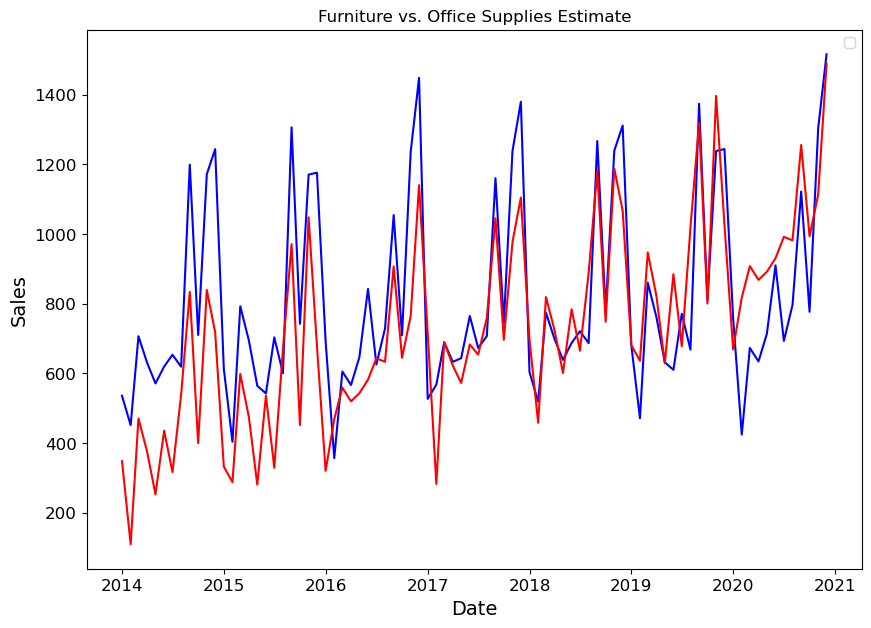

In [28]:
#Plotting the Trends in the Furniture vs. Supplies Estimates
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

# **Trends and Patterns**

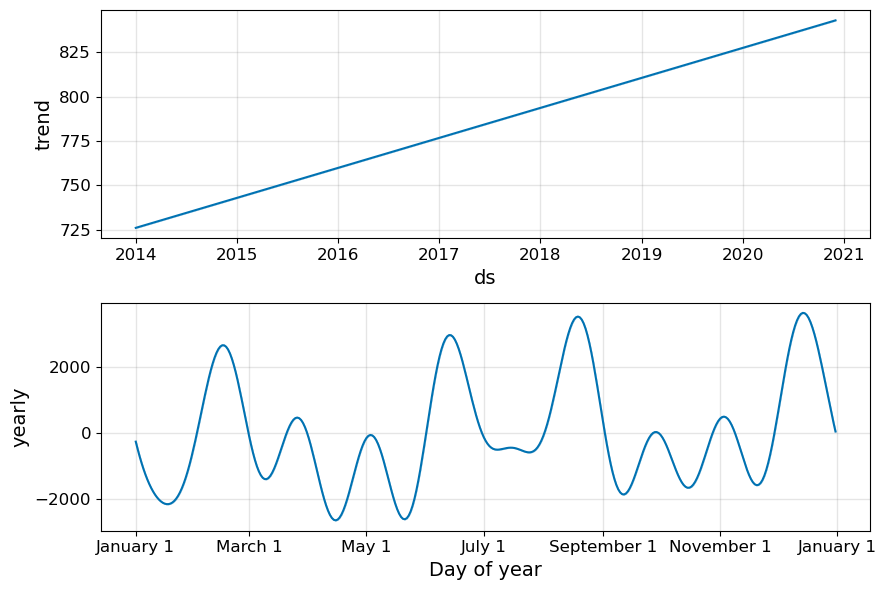

In [29]:
#Furniture model components visualization
furniture_model.plot_components(furniture_forecast);

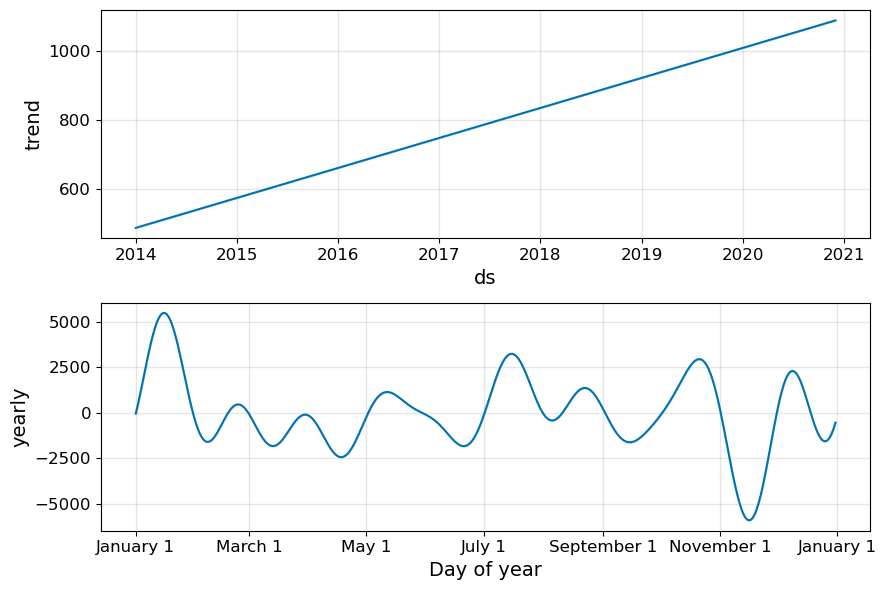

In [30]:
#Office Supplies componets Visualizaation
office_model.plot_components(office_forecast);